In [1]:
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser as parser

from datetime import datetime

In [2]:
# Remember, we should have the following files in the top level directory:
# artists.csv, charts.csv, dict_artists.json, and tracks.csv
try:
    artists_df = pd.read_csv("./artists.csv")
    charts_df = pd.read_csv("./charts.csv")
    tracks_df = pd.read_csv("./tracks.csv")
except:
    pass

In [3]:
with open('dict_artists.json') as f:
   dict_artists = json.load(f)
# dict_artists

In [4]:
artists_df.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
artists_df.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [6]:
charts_df.head(5)

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [7]:
charts_df.describe()

,rank,streams
count,2.617351e+07,2.032190e+07
mean,8.092314e+01,5.526131e+04
std,5.918601e+01,2.095872e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.546000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,3.540900e+04
max,2.000000e+02,1.974970e+07


In [8]:
tracks_df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [9]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [10]:
a = tracks_df.tail(10)
a

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586662,4Zp3rm12p5PiHToYJflmyy,Meet Again,57,273587,0,['KIMSEJEONG'],['1lFLniFTaPjYCtQZvDXpqu'],2020-12-20,0.476,0.4400,3,-8.508,1,0.0488,0.679,0.000000,0.0926,0.2410,135.814,4
586663,4ow9HehIdFii1cggylW2k0,四季予你 - DJ版,47,156393,0,"['程響', '阿卓']","['7nKA1c1Qn6nI0XA8yburf3', '7g8hOWXtGS16J30CMU...",2020-12-29,0.677,0.9700,0,-3.388,0,0.0446,0.134,0.002340,0.3020,0.9080,140.026,4
586664,1Kzjk1EyngBcP4T8x3fyqv,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,205238,0,['Boon Hui Lu'],['6PWJWwEm8BSBFAIAUWlwe4'],2020-03-03,0.743,0.6790,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.3950,126.070,4
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,106002,0,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.7230,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [15]:
charts_df.head(5)

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [16]:
# filter by region (only do US)

# for artists, best not to do them 1 at a time, we could make a new parameter to group artists together
# number of previous hits, followers, previous streams in top 200

# step 1 : determine a metric of success (probably based on stream count, not just rank)
# stream count / day, length of time on the leaderboard


# step 2 : make a question: I think a good question would be something like, what features make a song popular during the summer, vs not summer?
# danceability, energy, loudness, liveness would probably be pretty good for this.

# does time of year impact the features that make a song popular
# we could do 3 month chunks (roughly corresponding with the various seasons)
# make models for each chunk, and then at the end see the differences

# we should definitely standardize the data.

# note: from the heatmap below, energy and loudness have the strongest correlation with each other (which makes sense.)

<AxesSubplot:>

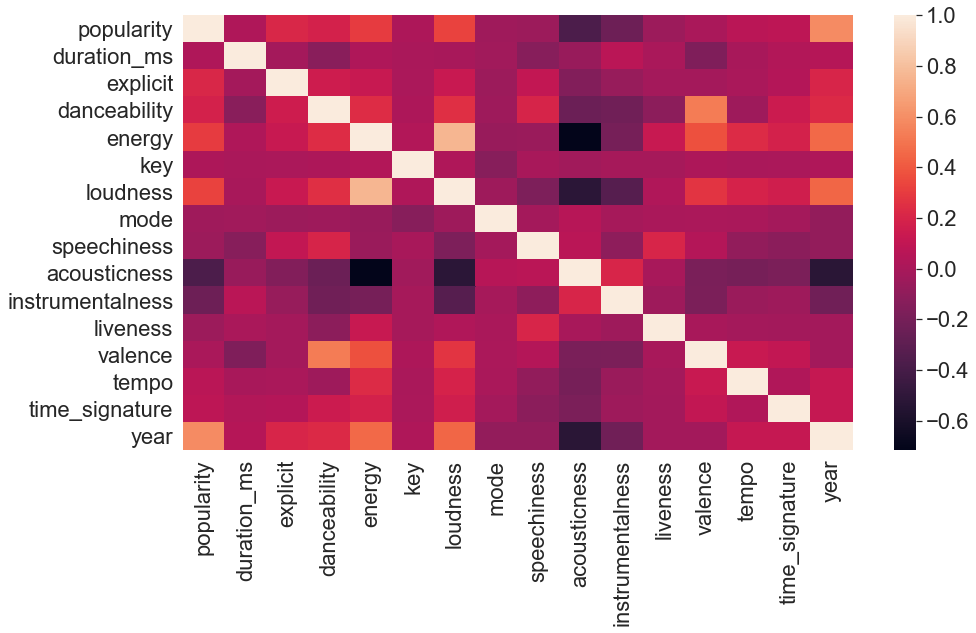

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)
sns.heatmap(tracks_df.corr())

In [18]:
# Title, Authors
# What is the question you will be working on? Why is it interesting?
# What is the data you will be using? Include data source, size of dataset, main features to be used. Please also include summary statistics of your data.
# What prediction algorithms do you plan to use? Please describe them in detail.
# How will you evaluate your results? Please describe your chosen performance metrices and/or statistical tests in detail.

# What is the question you will be working on? Why is it interesting?
The question we will be working on is identifying what traits make a song successful, during specific seasons. 
It is interesting because artists could potentially use it to determine when to come out with a particular type of song/album. They might be also able to see what day of the week is best for releasing content.

# What is the data you will be using? Include data source, size of dataset, main features to be used. Please also include summary statistics of your data.

The data we will be using is Spotify data from 2017 to 2021, for top charts. Also Spotify data which characterizes song features:

artists.csv: 1162095 rows, we would mainly want the artist name, popularity, and number of followers, (and potentially genre)

charts.csv: 26173514 rows. we would filter this down to the recent data we want to study. We would basically use this file to generate a metric of how successful a given song is (probably a mixture of the number of streams, as well as how long it stayed on the top200 chart).

tracks.csv: 586672 rows. this has information that Spotify generated, characterizing various songs with continuous data (loudness, energy, danceability), as well as some discrete data (key, time_signature). based on the different seasons, we will try to predict how successful a song will be given it's characteristics.

# What prediction algorithms do you plan to use? Please describe them in detail.
we would use linear regression models, based on some of the Spotify track characteristics we choose
< list parameters here >

in order to predict the songs success
< maybe give more specific equation of how we will generate success metric >

# How will you evaluate your results? Please describe your chosen performance metrices and/or statistical tests in detail.
loss values
RMSE
R^2

In [19]:
# next steps:

# clean up the above wording, standardize/normalize, screenshots of the .describe, but also include
# more EDA vis (distribution plots, box plots, etc)